In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix
from ast import literal_eval
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [3]:
%cd /content/tweets-2019-cleaned-final.csv

[Errno 20] Not a directory: '/content/tweets-2019-cleaned-final.csv'
/content


In [13]:
# Load the dataset
df = pd.read_csv('tweets-2019-cleaned-final.csv', converters={"message": literal_eval})
df = df.astype({'Content': 'str'})
df.head(1000)

,Tweet ID,Username,Content,Created At,User Location
0,1082720989799239680,pkcLV,"Exactly!\n\nAs Greta Thunberg,a 15-yr-old from...",2019-01-08 19:29:34+00:00,peterkc1 on Post
1,1082694057854414848,AOC,The American people did not organize the bigge...,2019-01-08 17:42:33+00:00,"Bronx + Queens, NYC"
2,1082680822447124480,squiffcreative,Have you heard ‘Change is coming featuring Gre...,2019-01-08 16:49:57+00:00,forest of dean
3,1082676373116702720,Veeresh22972960,@DrShekharPatel grateful 2 u 2 follow me great...,2019-01-08 16:32:17+00:00,forest
4,1082663069824749568,peter_sorenson1,We need RADICALS 2 make change happen. Abraham...,2019-01-08 15:39:25+00:00,North Texas USA
...,...,...,...,...,...
995,1103194772309716993,forumdc,Greta #Thunberg has inspired other students by...,2019-03-06 07:25:04+00:00,"Frankfurt, Germany"
996,1103193268744060928,RollingStone,Watch climate activist Greta Thunberg talk abo...,2019-03-06 07:19:06+00:00,"New York, New York"
997,1103160310830063616,crowfreak,How Greta Thunberg’s Lone Strike Against Clima...,2019-03-06 05:08:08+00:00,Pacific Northwest native
998,1103158550774382592,AlbertaChampion,The anti-climate change movement started by Sw...,2019-03-06 05:01:08+00:00,"Calgary, Alberta"


##Visualizing the entire dataset's rows and columns  

In [10]:
import pandas as pd
from ast import literal_eval

# Load the dataset
df = pd.read_csv('tweets-2019-cleaned-final.csv', converters={"message": literal_eval})
df = df.astype({'Content': 'str'})

# Display the entire DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df)

                  Tweet ID         Username                                            Content                 Created At               User Location
0      1082720989799239680            pkcLV  Exactly!\n\nAs Greta Thunberg,a 15-yr-old from...  2019-01-08 19:29:34+00:00            peterkc1 on Post
1      1082694057854414848              AOC  The American people did not organize the bigge...  2019-01-08 17:42:33+00:00         Bronx + Queens, NYC
2      1082680822447124480   squiffcreative  Have you heard ‘Change is coming featuring Gre...  2019-01-08 16:49:57+00:00              forest of dean
3      1082676373116702720  Veeresh22972960  @DrShekharPatel grateful 2 u 2 follow me great...  2019-01-08 16:32:17+00:00                      forest
4      1082663069824749568  peter_sorenson1  We need RADICALS 2 make change happen. Abraham...  2019-01-08 15:39:25+00:00             North Texas USA
...                    ...              ...                                                ...      

##Performing sentiment analysis using VADER sentiment analysis tool

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


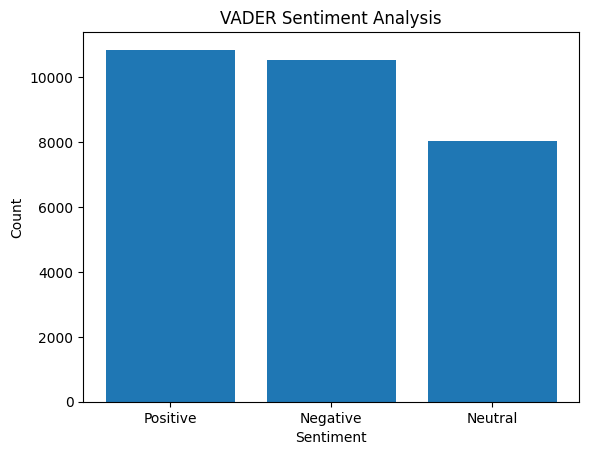

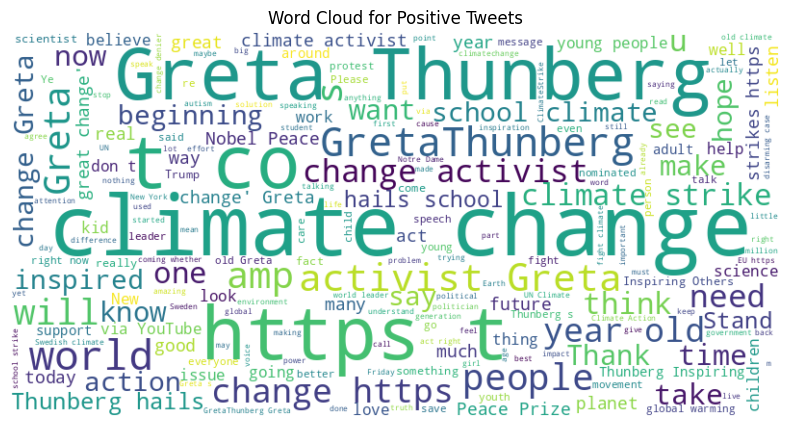

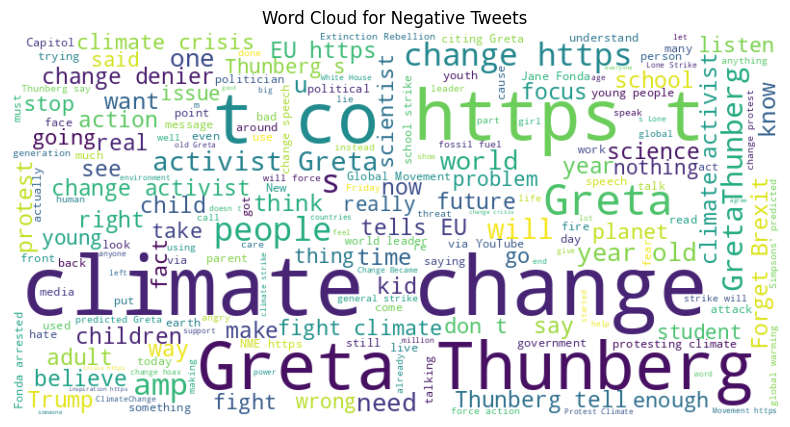

In [5]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the VADER lexicon (run once)
nltk.download('vader_lexicon')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('tweets-2019-cleaned-final.csv')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment using VADER
def get_sentiment_vader(tweet):
    sentiment_scores = sid.polarity_scores(tweet)

    # Classify the sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis to each tweet
df['vader_sentiment'] = df['Content'].apply(get_sentiment_vader)

# Visualize the distribution of VADER sentiments
vader_sentiment_counts = df['vader_sentiment'].value_counts()
plt.bar(vader_sentiment_counts.index, vader_sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('VADER Sentiment Analysis')
plt.show()

# Generate a Word Cloud for the positive tweets
positive_tweets = df[df['vader_sentiment'] == 'Positive']['Content'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

#Also Generate a Word Cloud for the negative tweets
positive_tweets = df[df['vader_sentiment'] == 'Negative']['Content'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()


##Using Textblob to label the tweets as positive, negative or neutral

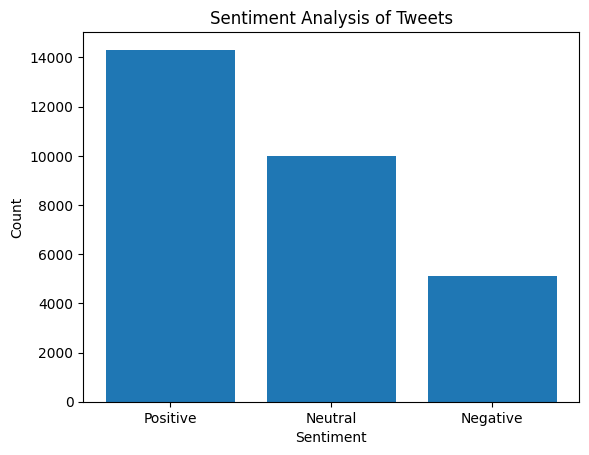

In [15]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('tweets-2019-cleaned-final.csv')

# Function to get sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to each tweet
df['sentiment'] = df['Content'].apply(get_sentiment)

# Save the labeled tweets to a new CSV file
df.to_csv('tweets_2019_with_sentiment.csv', index=False)

# Visualize the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()